## Final Project Submission
Please fill out:

> Student name: **Waweru Brian**

> Student pace: Self paced / part time

> Scheduled project review date/time:

> Instructor name: William Okomba, Noah Kandie and Samuel G. Mwangi

> Blog post URL: N/A

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
# For Dataset
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Others
import string
import csv
import json

# Importing the dataframes into the notebook

In [2]:
! ls *.csv

bom.movie_gross.csv
name.basics.csv
test_df.csv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv


# INDIVIDUAL TABLES

## Table 1: Movies and Basic Financials

In [3]:
df1 = pd.read_csv('bom.movie_gross.csv')
df1.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


## Table 2: Professionals and Known Titles and Works

In [4]:
# df1.head(3)
df2 = pd.read_csv('name.basics.csv')
df2.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


## Table 3: Firm Titles, their Regions and where they are Original Films

In [5]:
df3 = pd.read_csv('title.akas.csv')
df3.head(3)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


## Table 4: Primary and Original Titles, StartYear, Runtime and Genre

In [6]:
df4 = pd.read_csv('title.basics.csv')
df4.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [7]:
df4.rename(columns = {'primary_title':'title'}, 
           inplace = True)
df4.head(3)

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


## Table 5: Directors and Writers

In [8]:
df5 = pd.read_csv('title.crew.csv')
df5.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


## Table 6: Principals of the movie

In [9]:
df6 = pd.read_csv('title.principals.csv')
df6.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


## Table 7: Average Ratings

In [10]:
df7 = pd.read_csv('title.ratings.csv')
df7.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


## Table 8: Original Langauge, Release dates, VoteCounts

In [11]:
df8 = pd.read_csv('tmdb.movies.csv', 
                  index_col = 0)
df8.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


## Table 9: ReleaseDates, ProdutionBudgets, Domestic and Worldwide Financials

In [12]:
df9 = pd.read_csv('tn.movie_budgets.csv')
df9.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


> **NOTE**: The `movie` should be renamed into `title`

In [13]:
df9.rename(columns = {'movie':'title'}, 
           inplace = True)

# Check whether the change has been made
if 'title' in df9.columns: print('Yes, `Movie` has been changed to `title`.')

Yes, `Movie` has been changed to `title`.


# Merging Table

**`Function` to check which columns are common between any 2 dataframes**

In [14]:
def column_check(dat1, dat2):
    """
    This function checks to see whether there are columns
    in common. 

    Function counterchecks whether any column in `dat1` has any 
    of its columns in `dat2` columns.
    
    """
    for i in dat1.columns:
        if i in dat2.columns:
            print('Yes, there is a column in common:', i)
        
    else:
        # print('\nNo, Sadly there is no columns are similar.')
        print('\nThe End!')

## `Table 1` and `Table 2`

In [15]:
column_check(df1, df2)


The End!


> There appears to be no common column to merge along for `Table 1` and  `Table 2`.\
> We move on to the next Table, `Table 3`

## `Table 1` and `Table 3`

In [16]:
column_check(df1, df3)

Yes, there is a column in common: title

The End!


In [17]:
df_13 = df1.merge(df3, 
                  on = 'title', 
                  how = 'outer',  
                  suffixes=('_fr1', '_fr3')
                 )
df_13.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,NaN,0.0
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,20.0,UY,NaN,NaN,3-D version,0.0
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,21.0,JP,en,NaN,NaN,0.0


## `Table 13` and `Table 4`

In [18]:
column_check(df_13, df4)

Yes, there is a column in common: title

The End!


In [19]:
df_134 = df_13.merge(df4, 
                  on = 'title', 
                  how = 'outer',  
                  suffixes=('_fr13', '_fr4')
                 )

df_134.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,NaN,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,20.0,UY,NaN,NaN,3-D version,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,21.0,JP,en,NaN,NaN,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"


## `Table 134` and `Table 5`

In [20]:
column_check(df_134, df5)

Yes, there is a column in common: tconst

The End!


In [21]:
df_1345 = df_134.merge(df5, 
                  on = 'tconst', 
                  how = 'outer',  
                  suffixes = ('_fr134', '_fr5')
                 )

df_1345.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title,tconst,original_title,start_year,runtime_minutes,genres,directors,writers
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,NaN,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335"
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,20.0,UY,NaN,NaN,3-D version,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335"
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,21.0,JP,en,NaN,NaN,0.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335"


## `Table 1345` and `Table 6`

In [22]:
column_check(df_1345, df6)

Yes, there is a column in common: ordering
Yes, there is a column in common: tconst

The End!


In [23]:
df_13456 = df_1345.merge(df6, 
                  on = 'tconst', 
                  how = 'outer',  
                  suffixes = ('_fr1345', '_fr6')
                 )

df_13456.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering_fr1345,region,language,types,...,start_year,runtime_minutes,genres,directors,writers,ordering_fr6,nconst,category,job,characters
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",10.0,nm0005271,composer,NaN,NaN
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",1.0,nm0000158,actor,NaN,"[""Woody""]"
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,2010.0,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",2.0,nm0000741,actor,NaN,"[""Buzz Lightyear""]"


In [24]:
## `Table 13456` and `Table 7`

In [25]:
column_check(df_13456, df7)

Yes, there is a column in common: tconst

The End!


In [26]:
df_134567 = df_13456.merge(df7, 
                  on = 'tconst', 
                  how = 'outer',  
                  suffixes = ('_fr13456', '_fr7')
                 )
df_134567.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering_fr1345,region,language,types,...,genres,directors,writers,ordering_fr6,nconst,category,job,characters,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",10.0,nm0005271,composer,NaN,NaN,8.3,682218.0
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",1.0,nm0000158,actor,NaN,"[""Woody""]",8.3,682218.0
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",2.0,nm0000741,actor,NaN,"[""Buzz Lightyear""]",8.3,682218.0


## `Table 134567` and `Table 8`

In [27]:
column_check(df_134567, df8)

Yes, there is a column in common: title
Yes, there is a column in common: original_title

The End!


In [28]:
df_1345678 = df_134567.merge(df8,
                  on = 'title', 
                  how = 'outer',  
                  suffixes=('_fr134567', '_fr8')
                 )

df_1345678.head(3)

,title,studio,domestic_gross,foreign_gross,year,title_id,ordering_fr1345,region,language,types,...,averagerating,numvotes,genre_ids,id,original_language,original_title_fr8,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,8.3,682218.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,8.3,682218.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,8.3,682218.0,"[16, 10751, 35]",10193.0,en,Toy Story 3,24.445,2010-06-17,7.7,8340.0


## `Table 1345678` and `Table 9`

In [29]:
column_check(df_1345678, df9)

Yes, there is a column in common: title
Yes, there is a column in common: domestic_gross
Yes, there is a column in common: id
Yes, there is a column in common: release_date

The End!


In [30]:
df_13456789 = df_1345678.merge(df9,
                  on = 'title', 
                  how = 'outer',  
                  suffixes = ('_fr1345678', '_fr9')
                 )

df_13456789.head(3)

,title,studio,domestic_gross_fr1345678,foreign_gross,year,title_id,ordering_fr1345,region,language,types,...,original_title_fr8,popularity,release_date_fr1345678,vote_average,vote_count,id_fr9,release_date_fr9,production_budget,domestic_gross_fr9,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,Toy Story 3,24.445,2010-06-17,7.7,8340.0,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,Toy Story 3,24.445,2010-06-17,7.7,8340.0,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,Toy Story 3,24.445,2010-06-17,7.7,8340.0,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"


## LASTLY
## `Table 13456789` and `Table 2`

In [31]:
column_check(df_13456789, df2)

Yes, there is a column in common: nconst

The End!


In [32]:
df_1to9 = df_13456789.merge(df2,
                  on = 'nconst', 
                  how = 'outer',  
                  suffixes = ('_fr1345678', '_fr9')
                 )

df_1to9.head(3)

,title,studio,domestic_gross_fr1345678,foreign_gross,year,title_id,ordering_fr1345,region,language,types,...,id_fr9,release_date_fr9,production_budget,domestic_gross_fr9,worldwide_gross,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,15.0,DK,NaN,NaN,...,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",Randy Newman,1943.0,NaN,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
1,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,20.0,UY,NaN,NaN,...,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",Randy Newman,1943.0,NaN,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"
2,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,21.0,JP,en,NaN,...,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",Randy Newman,1943.0,NaN,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338"


# INSPECTION OF COLUMNS

In [33]:
len(df_1to9.columns)

44

In [34]:
df_1to9.columns

Index(['title', 'studio', 'domestic_gross_fr1345678', 'foreign_gross', 'year',
       'title_id', 'ordering_fr1345', 'region', 'language', 'types',
       'attributes', 'is_original_title', 'tconst', 'original_title_fr134567',
       'start_year', 'runtime_minutes', 'genres', 'directors', 'writers',
       'ordering_fr6', 'nconst', 'category', 'job', 'characters',
       'averagerating', 'numvotes', 'genre_ids', 'id_fr1345678',
       'original_language', 'original_title_fr8', 'popularity',
       'release_date_fr1345678', 'vote_average', 'vote_count', 'id_fr9',
       'release_date_fr9', 'production_budget', 'domestic_gross_fr9',
       'worldwide_gross', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [35]:
## Rearranging the columns
columns = [
    # Film Attributes
    'title_id', 'studio', 'language', 
    'title', 'original_title_fr8',
    'is_original_title',  'original_title_fr134567',
    'attributes', 'genres', 'genre_ids', 'characters',
    'runtime_minutes', 'category', 'types',
    
    # Timelines and Region
    'year', 'start_year', 'region', 'original_language', 
    'release_date_fr1345678', 'release_date_fr9', 
    
    # Professionals
    'primary_name', 'birth_year', 'death_year',
    'primary_profession', 'known_for_titles',
    'directors', 'writers', 'tconst', 'nconst', 'job',
    
    # Financials
    'production_budget', 'domestic_gross_fr1345678', 
    'domestic_gross_fr9', 'foreign_gross', 'worldwide_gross', 
    
    # Popularity Scores
    'averagerating', 'numvotes',  
    'vote_average', 'vote_count',
    'popularity',
    
    # Unknowns
    'ordering_fr1345', 'ordering_fr6', 'id_fr9',
    'id_fr1345678'
]

In [36]:
df = df_1to9[columns]
df.head(2)

,title_id,studio,language,title,original_title_fr8,is_original_title,original_title_fr134567,attributes,genres,genre_ids,...,worldwide_gross,averagerating,numvotes,vote_average,vote_count,popularity,ordering_fr1345,ordering_fr6,id_fr9,id_fr1345678
0,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,15.0,10.0,47.0,10193.0
1,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,20.0,10.0,47.0,10193.0


# FIRST CLEAN-`OUT` ALL EMPTY ROWS ALONG `title` AND `title_id`

In [37]:
# Checking the none-empty rows along `title_id` columns
df.loc[df.title_id.notna()]

,title_id,studio,language,title,original_title_fr8,is_original_title,original_title_fr134567,attributes,genres,genre_ids,...,worldwide_gross,averagerating,numvotes,vote_average,vote_count,popularity,ordering_fr1345,ordering_fr6,id_fr9,id_fr1345678
0,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,15.0,10.0,47.0,10193.0
1,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,20.0,10.0,47.0,10193.0
2,tt0435761,BV,en,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,21.0,10.0,47.0,10193.0
3,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,22.0,10.0,47.0,10193.0
4,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,1.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,27.0,10.0,47.0,10193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277484,tt9880178,NaN,en,The Attention,NaN,0.0,La atención,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN
2277485,tt9880178,NaN,en,The Attention,NaN,0.0,La atención,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,NaN,NaN
2277486,tt9880178,NaN,en,The Attention,NaN,0.0,La atención,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,NaN,NaN
2277487,tt9880178,NaN,en,The Attention,NaN,0.0,La atención,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349428 entries, 0 to 2349427
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   title_id                  object 
 1   studio                    object 
 2   language                  object 
 3   title                     object 
 4   original_title_fr8        object 
 5   is_original_title         float64
 6   original_title_fr134567   object 
 7   attributes                object 
 8   genres                    object 
 9   genre_ids                 object 
 10  characters                object 
 11  runtime_minutes           float64
 12  category                  object 
 13  types                     object 
 14  year                      float64
 15  start_year                float64
 16  region                    object 
 17  original_language         object 
 18  release_date_fr1345678    object 
 19  release_date_fr9          object 
 20  primary_name            

In [39]:
# none empty `title_id`
2349428 - 2209381

140047

In [40]:
# Checking the none-empty rows along `title` columns
df.loc[df.title.notna()]

,title_id,studio,language,title,original_title_fr8,is_original_title,original_title_fr134567,attributes,genres,genre_ids,...,worldwide_gross,averagerating,numvotes,vote_average,vote_count,popularity,ordering_fr1345,ordering_fr6,id_fr9,id_fr1345678
0,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,15.0,10.0,47.0,10193.0
1,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,20.0,10.0,47.0,10193.0
2,tt0435761,BV,en,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,21.0,10.0,47.0,10193.0
3,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,22.0,10.0,47.0,10193.0
4,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,1.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,27.0,10.0,47.0,10193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347065,NaN,NaN,NaN,Chico Albuquerque - Revelações,NaN,NaN,Chico Albuquerque - Revelações,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2347066,NaN,NaN,NaN,Chico Albuquerque - Revelações,NaN,NaN,Chico Albuquerque - Revelações,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2347067,NaN,NaN,NaN,Chico Albuquerque - Revelações,NaN,NaN,Chico Albuquerque - Revelações,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2347068,NaN,NaN,NaN,Chico Albuquerque - Revelações,NaN,NaN,Chico Albuquerque - Revelações,NaN,Documentary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [41]:
# none empty `title`
2349428 - 2347064 

2364

In [42]:
print(df.shape)

# Drop the empty rows in either `title` or `title_id`
df.dropna(subset = ['title', 'title_id'],
          inplace = True)

# df.dropna(df.title_id.isnull(), 
#           inplace = True)

print(df.shape)

(2349428, 44)
(2209375, 44)


C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\376894388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['title', 'title_id'],


In [43]:
# number of removed rows
2349428 - 2209375

140053

# Thorough Check

In [44]:
df.head(3)

,title_id,studio,language,title,original_title_fr8,is_original_title,original_title_fr134567,attributes,genres,genre_ids,...,worldwide_gross,averagerating,numvotes,vote_average,vote_count,popularity,ordering_fr1345,ordering_fr6,id_fr9,id_fr1345678
0,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,15.0,10.0,47.0,10193.0
1,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,20.0,10.0,47.0,10193.0
2,tt0435761,BV,en,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",...,"$1,068,879,522",8.3,682218.0,7.7,8340.0,24.445,21.0,10.0,47.0,10193.0


In [45]:
## Rearranging the unknown columns
columns = [
    # Film Attributes
    'title_id', 'studio', 'language', 
    'title', 'original_title_fr8',
    'is_original_title',  'original_title_fr134567',
    'attributes', 'genres', 'genre_ids', 'characters',
    'runtime_minutes', 'types',
    
    # Timelines and Region
    'year', 'start_year', 'region', 'original_language', 
    'release_date_fr1345678', 'release_date_fr9', 
    
    # Professionals
    'primary_name', 'category', 'birth_year', 'death_year',
    'primary_profession', 'known_for_titles',
    'directors', 'writers', 'tconst', 'nconst', 'job',
    
    # Financials
    'production_budget', 'domestic_gross_fr1345678', 
    'domestic_gross_fr9', 'foreign_gross', 'worldwide_gross', 
    
    # Popularity Scores
    'averagerating', 'numvotes',  
    'vote_average', 'vote_count',
    'popularity'
]

In [46]:
# First remove unknown columns
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209375 entries, 0 to 2277488
Data columns (total 40 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   title_id                  object 
 1   studio                    object 
 2   language                  object 
 3   title                     object 
 4   original_title_fr8        object 
 5   is_original_title         float64
 6   original_title_fr134567   object 
 7   attributes                object 
 8   genres                    object 
 9   genre_ids                 object 
 10  characters                object 
 11  runtime_minutes           float64
 12  types                     object 
 13  year                      float64
 14  start_year                float64
 15  region                    object 
 16  original_language         object 
 17  release_date_fr1345678    object 
 18  release_date_fr9          object 
 19  primary_name              object 
 20  category                  obj

## (i) Film Attributes

In [47]:
# First focusing on the `Film Attributes`
Film_Attributes = [
    'title_id', 'studio', 'language', 
    'title', 'original_title_fr8',
    'is_original_title',  'original_title_fr134567',
    'attributes', 'genres', 'genre_ids', 'characters',
    'runtime_minutes', 'types'
]

df_Film_Att = df[Film_Attributes]
df_Film_Att.head()

,title_id,studio,language,title,original_title_fr8,is_original_title,original_title_fr134567,attributes,genres,genre_ids,characters,runtime_minutes,types
0,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN
1,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN
2,tt0435761,BV,en,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN
3,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,0.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,imdbDisplay
4,tt0435761,BV,NaN,Toy Story 3,Toy Story 3,1.0,Toy Story 3,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,original


In [48]:
df_Film_Att.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209375 entries, 0 to 2277488
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   title_id                 object 
 1   studio                   object 
 2   language                 object 
 3   title                    object 
 4   original_title_fr8       object 
 5   is_original_title        float64
 6   original_title_fr134567  object 
 7   attributes               object 
 8   genres                   object 
 9   genre_ids                object 
 10  characters               object 
 11  runtime_minutes          float64
 12  types                    object 
dtypes: float64(2), object(11)
memory usage: 236.0+ MB


In [49]:
# No of title ids
print(len(df.title_id))
# No of titles
print(len(df.title))

len(df.title_id) - len(df.title)

2209375
2209375


0

252780

15539

833711
The number of unique `title` in the dataset, 252780
The number of unique `original_title_fr134567` in the dataset, {unique_original_title_fr134567}
The number of unique `original_title` in the dataset, 15539, end = '

'


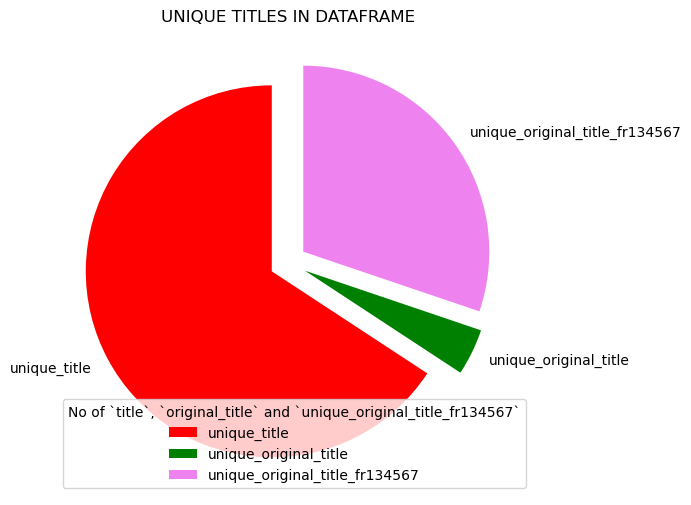

In [50]:
# No of Unique `title` along the `title` column
print(len(df_Film_Att['title'].unique()), end = '\n\n')

# No of Unique `original_title` along the `original_title` column
print(len(df_Film_Att['original_title_fr8'].unique()), end = '\n\n')

# Check how many title are similar
print((df_Film_Att['title'] == df_Film_Att['original_title_fr8']).sum())

# No of unique values
unique_title = len(df_Film_Att['title'].unique())
unique_original_title = len(df_Film_Att['original_title_fr8'].unique())
unique_original_title_fr134567 = len(df_Film_Att['original_title_fr134567'].unique())

# Print the above info
print(f'The number of unique `title` in the dataset, {unique_title}')
print('The number of unique `original_title_fr134567` in the dataset, {unique_original_title_fr134567}')
print(f"The number of unique `original_title` in the dataset, {unique_original_title}, end = '\n\n'")

# PieChart
y = np.array([unique_title, unique_original_title, unique_original_title_fr134567])
mylabels = ["unique_title", "unique_original_title", 'unique_original_title_fr134567']

# Plot size
plt.figure(figsize = (6, 8))

# Plot Title
plt.title("UNIQUE TITLES IN DATAFRAME")

# plot parameters
myexplode = [.1, 0.1, 0.1]
mycolors = ['red', 'green', 'violet']

# The Plot
plt.pie(y, labels = mylabels, startangle = 90, 
        explode = myexplode, shadow = False, 
        colors = mycolors)

# Plot Legend
plt.legend(title = 'No of `title`, `original_title` and `unique_original_title_fr134567`', loc ="lower left")
plt.show()

# Recommendations

> (i) Remove the `title` column and `title_id` since `title_id` denote the same title and since `title` column takes more space on the dataset. This can be seen from above.
> (ii) Remove `is_original_title` and `unique_original_title_fr134567` from the dataset

In [51]:
# Stripped of columns
Film_Attributes = [
    'title_id', 'studio', 'language', 
    'is_original_title', 'attributes', 
    'genres', 'genre_ids', 'characters',
    'runtime_minutes', 'types'
]

df_Film_Att = df_Film_Att[Film_Attributes]
df_Film_Att.head(3)

,title_id,studio,language,is_original_title,attributes,genres,genre_ids,characters,runtime_minutes,types
0,tt0435761,BV,NaN,0.0,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN
1,tt0435761,BV,NaN,0.0,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN
2,tt0435761,BV,en,0.0,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",NaN,103.0,NaN


In [52]:
# types columns
df_Film_Att.types.unique()

array([nan, 'imdbDisplay', 'original', 'working', 'alternative', 'dvd',
       'festival', 'video', 'tv', 'dvd\x02imdbDisplay',
       'festival\x02working'], dtype=object)

In [53]:
df_Film_Att.attributes.unique()[:10]

array([nan, '3-D version', 'complete title', 'literal title',
       'DVD box title', 'original subtitled version',
       'Berlin film festival title', 'short title',
       'original script title', 'dubbed version'], dtype=object)

In [54]:
df_Film_Att.characters.unique()

array([nan, '["Woody"]', '["Larry Crowne"]', ..., '["Il vigile"]',
       '["Direttore TV Padre Pio"]', '["Thorpe"]'], dtype=object)

> <font size='10px'>**NOTE**:</font>\
> <font size='5px'>(i) These, `types`, `attributes`, `characters`, would not be useful, at least for the moment. Best to remove them,</font>\
>
> <font size='5px'>(ii) We can change the atributes on the `is_original_title` to `Yes`, `No` and `Unknown`.</font>\

> .<font size='5px'>(iii) We can change the dtype of values along the `runtime_minutes` from a `float64` to `int64`.</font>\

> .<font size='5px'>(iv) Check the values along `genres` and `genres_ids`.</font>

In [55]:
# final strip of columns
Film_Attributes = [
    'title_id', 'studio', 'language', 
    'is_original_title', 'attributes', 
    'genres', 'genre_ids', 'runtime_minutes'
]

df_Film_Att = df_Film_Att[Film_Attributes]
df_Film_Att.head(3)

,title_id,studio,language,is_original_title,attributes,genres,genre_ids,runtime_minutes
0,tt0435761,BV,NaN,0.0,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0
1,tt0435761,BV,NaN,0.0,3-D version,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0
2,tt0435761,BV,en,0.0,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0


## (ii) Timelines and Region

In [56]:
Timelines_and_Region = [
    'year', 'start_year', 'region', 'original_language', 
    'release_date_fr1345678', 'release_date_fr9'
]

time_and_Reg_Df = df[Timelines_and_Region]
time_and_Reg_Df.head()

,year,start_year,region,original_language,release_date_fr1345678,release_date_fr9
0,2010.0,2010.0,DK,en,2010-06-17,"Jun 18, 2010"
1,2010.0,2010.0,UY,en,2010-06-17,"Jun 18, 2010"
2,2010.0,2010.0,JP,en,2010-06-17,"Jun 18, 2010"
3,2010.0,2010.0,ES,en,2010-06-17,"Jun 18, 2010"
4,2010.0,2010.0,NaN,en,2010-06-17,"Jun 18, 2010"


> **NOTE**\
> Dropping `release_date_fr9` since it is not enumerable and retain `release_date_fr1345678` then rename as `release_date`.\
> We also need to convert the `year` and `start_year` to `int`.

In [57]:
final_time_and_region = [
    'year', 'start_year', 'region', 
    'original_language', 'release_date_fr1345678'
]

# (iii) Professionals

In [58]:
Professionals = [
    'primary_name', 'birth_year', 'death_year', 'category',
    'primary_profession', 'known_for_titles',
    'directors', 'writers', 'tconst', 'nconst', 'job'
]

prof_df = df[Professionals]
prof_df.head()

,primary_name,birth_year,death_year,category,primary_profession,known_for_titles,directors,writers,tconst,nconst,job
0,Randy Newman,1943.0,NaN,composer,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",tt0435761,nm0005271,NaN
1,Randy Newman,1943.0,NaN,composer,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",tt0435761,nm0005271,NaN
2,Randy Newman,1943.0,NaN,composer,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",tt0435761,nm0005271,NaN
3,Randy Newman,1943.0,NaN,composer,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",tt0435761,nm0005271,NaN
4,Randy Newman,1943.0,NaN,composer,"soundtrack,music_department,composer","tt0435761,tt0114709,tt0780521,tt0212338",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",tt0435761,nm0005271,NaN


# (iv) Financials

In [59]:
Financials = ['production_budget', 'domestic_gross_fr1345678', 
    'domestic_gross_fr9', 'foreign_gross', 'worldwide_gross']

In [60]:
fin_df = df[Financials]
fin_df.head()

,production_budget,domestic_gross_fr1345678,domestic_gross_fr9,foreign_gross,worldwide_gross
0,"$200,000,000",415000000.0,"$415,004,880",652000000,"$1,068,879,522"
1,"$200,000,000",415000000.0,"$415,004,880",652000000,"$1,068,879,522"
2,"$200,000,000",415000000.0,"$415,004,880",652000000,"$1,068,879,522"
3,"$200,000,000",415000000.0,"$415,004,880",652000000,"$1,068,879,522"
4,"$200,000,000",415000000.0,"$415,004,880",652000000,"$1,068,879,522"


> **NOTE**\
> Dropping `domestic_gross_fr1345678` and `foreign_gross`.\
> Retaining `domestic_gross_fr9` and `worldwide_gross` then rename to `domestic_gross` 

In [61]:
fin_financials = [
    'production_budget',  'domestic_gross_fr9', 
    'foreign_gross', 'worldwide_gross'
]

In [62]:
# (v) Popularity Scores
Popularity_scores = [
    'vote_average', 'vote_count',
    'popularity'
]

Pop_score_df = df[Popularity_scores]
Pop_score_df.head()

,vote_average,vote_count,popularity
0,7.7,8340.0,24.445
1,7.7,8340.0,24.445
2,7.7,8340.0,24.445
3,7.7,8340.0,24.445
4,7.7,8340.0,24.445


In [63]:
fin_cols = [
    # financial attributes
    'title_id', 'studio', 'language', 
    'is_original_title', 
    'genres', 'genre_ids', 'runtime_minutes',
    
    # timelines and financials
    'year', 'start_year', 'region', 
    'original_language', 'release_date_fr1345678',
    
    # professionals
    'primary_name', 'birth_year', 'death_year', 'category',
    'primary_profession', 'known_for_titles',
    'directors', 'writers', 'tconst', 'nconst', 'job',
    
    # Financials
    'production_budget',  'domestic_gross_fr9', 
    'foreign_gross', 'worldwide_gross',

    # Popularity Scores
    'vote_average', 'vote_count',
    'popularity'
]

# Final DF 

In [64]:
df = df[fin_cols]
df.head()

,title_id,studio,language,is_original_title,genres,genre_ids,runtime_minutes,year,start_year,region,...,tconst,nconst,job,production_budget,domestic_gross_fr9,foreign_gross,worldwide_gross,vote_average,vote_count,popularity
0,tt0435761,BV,NaN,0.0,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,DK,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
1,tt0435761,BV,NaN,0.0,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,UY,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
2,tt0435761,BV,en,0.0,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,JP,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
3,tt0435761,BV,NaN,0.0,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,ES,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
4,tt0435761,BV,NaN,1.0,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,NaN,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209375 entries, 0 to 2277488
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   title_id                object 
 1   studio                  object 
 2   language                object 
 3   is_original_title       float64
 4   genres                  object 
 5   genre_ids               object 
 6   runtime_minutes         float64
 7   year                    float64
 8   start_year              float64
 9   region                  object 
 10  original_language       object 
 11  release_date_fr1345678  object 
 12  primary_name            object 
 13  birth_year              float64
 14  death_year              float64
 15  category                object 
 16  primary_profession      object 
 17  known_for_titles        object 
 18  directors               object 
 19  writers                 object 
 20  tconst                  object 
 21  nconst                  object 
 22 

# Data Cleaning

In [66]:
# Checking the unique elements in the 
# `is_original_title`
df.is_original_title.unique()

array([ 0.,  1., nan])

(i) converting the data entries along `is_original_title`; `1.0`, `0.0` and `nan` to `Yes`, `No` and `Unknown`

In [67]:
# convert the dtype
df.is_original_title.replace({0.0: 'No', 1.0: 'Yes', np.nan:'Unknown'}, inplace = True)

# Print the dtype of the column
df.is_original_title.dtype == 'O'

True

In [68]:
# print of each category in the 
# is_original_title
print(df.is_original_title.value_counts())

# Count of each category in the Original titles
Original_title = ((df.is_original_title == 'Yes').sum())
None_Original_title = ((df.is_original_title == 'No').sum())
Unknown_Original_title = ((df.is_original_title == 'Unknown').sum())

print(Original_title, None_Original_title, Unknown_Original_title)

is_original_title
No         1804501
Yes         404804
Unknown         70
Name: count, dtype: int64
404804 1804501 70


The number of unique `Original_title` in the dataset, 404804
The number of unique `None_original_title` in the dataset, 70
The number of unique `Unknown_Original_title` in the dataset, 70'



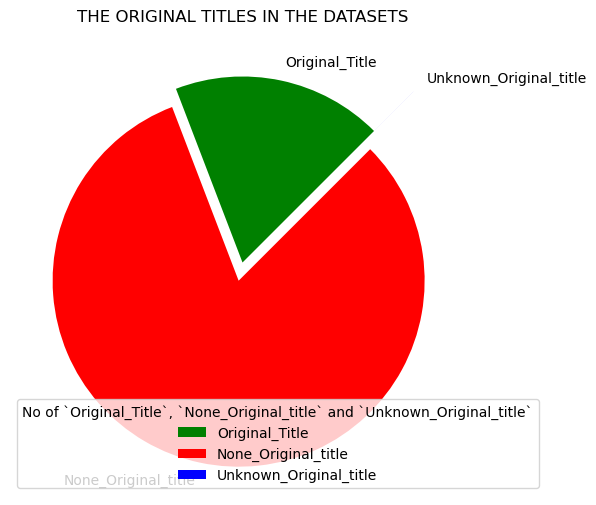

In [69]:
# Print the above info
print(f'The number of unique `Original_title` in the dataset, {Original_title}')
print(f'The number of unique `None_original_title` in the dataset, {Unknown_Original_title}')
print(f"The number of unique `Unknown_Original_title` in the dataset, {Unknown_Original_title}'"
     , end = '\n\n')


# PieChart
y = np.array((Original_title, None_Original_title, Unknown_Original_title))
mylabels = ["Original_Title", "None_Original_title", 'Unknown_Original_title']

# Plot size
plt.figure(figsize = (6, 8))

# Plot Title
plt.title("THE ORIGINAL TITLES IN THE DATASETS")

# plot parameters
myexplode = [0.0, 0.1, 0.3]
mycolors = ['green', 'red', 'blue']

# The Plot
plt.pie(y, labels = mylabels, startangle = 45, 
        explode = myexplode, shadow = False, 
        colors = mycolors)

# Plot Legend
plt.legend(title = 
           'No of `Original_Title`, `None_Original_title` and `Unknown_Original_title`', 
           loc ="lower left")

plt.show()

In [70]:
df.head(2)

,title_id,studio,language,is_original_title,genres,genre_ids,runtime_minutes,year,start_year,region,...,tconst,nconst,job,production_budget,domestic_gross_fr9,foreign_gross,worldwide_gross,vote_average,vote_count,popularity
0,tt0435761,BV,NaN,No,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,DK,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
1,tt0435761,BV,NaN,No,"Adventure,Animation,Comedy","[16, 10751, 35]",103.0,2010.0,2010.0,UY,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445


In [71]:
# Check how many null values are present
# in `runtime_minutes` column

# null_values_in_runtime
null_values_in_runtime = df.runtime_minutes.isnull().sum()
# non_null_values_in_runtime
non_null_values_in_runtime = df.runtime_minutes.notna().sum()

# Perc
total = df.shape[0]
# perc_null_values_in_runtime
perc_null_values_in_runtime = null_values_in_runtime / total * 100
# perc_non_null_values_in_runtime
perc_non_null_values_in_runtime = non_null_values_in_runtime / total * 100


# Print these values
print(f'Null values are {perc_non_null_values_in_runtime} %', 
      f'Non-Null values are {perc_null_values_in_runtime} %', 
      sep = '\n')

# Print how many they are
print(f'{null_values_in_runtime, 2}',
      f'{null_values_in_runtime}',
      f'{non_null_values_in_runtime}', 
      sep = '\n')

Null values are 79.48637057991513 %
Non-Null values are 20.513629420084868 %
(453223, 2)
453223
1756152


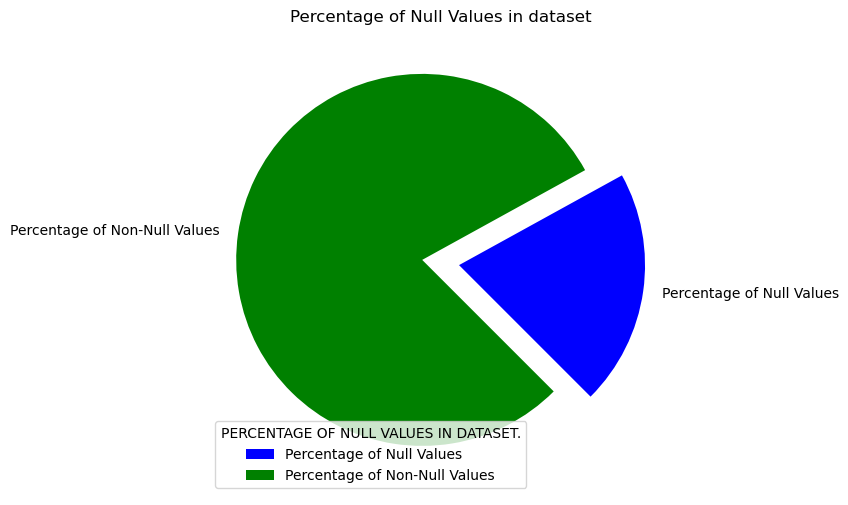

In [72]:
# PieChart
# For `runtime_minutes`
y = np.array([perc_null_values_in_runtime, 
              perc_non_null_values_in_runtime
             ])

mylabels = ["Percentage of Null Values", 
            "Percentage of Non-Null Values"]

# Plot size
plt.figure(figsize = (6, 8))

# Plot Title
plt.title("Percentage of Null Values in dataset")

# plot parameters
myexplode = [.1, 0.1]
mycolors = ['blue', 'green']

# The Plot
plt.pie(y, labels = mylabels, startangle = -45, 
        explode = myexplode, shadow = False, 
        colors = mycolors)

# Plot Legend
plt.legend(title = 
           'PERCENTAGE OF NULL VALUES IN DATASET.', 
           loc ="lower left")

plt.show()

In [73]:
# Dropping null values in `runtime_mninutes`
df.dropna(subset = ['runtime_minutes'], inplace = True)

In [74]:
# Executable 3

print(df.runtime_minutes.dtype) 
df.runtime_minutes = df.runtime_minutes.astype('int64')

float64


In [75]:
df.runtime_minutes.dtype

dtype('int64')

In [76]:
df.head(3)

,title_id,studio,language,is_original_title,genres,genre_ids,runtime_minutes,year,start_year,region,...,tconst,nconst,job,production_budget,domestic_gross_fr9,foreign_gross,worldwide_gross,vote_average,vote_count,popularity
0,tt0435761,BV,NaN,No,"Adventure,Animation,Comedy","[16, 10751, 35]",103,2010.0,2010.0,DK,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
1,tt0435761,BV,NaN,No,"Adventure,Animation,Comedy","[16, 10751, 35]",103,2010.0,2010.0,UY,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445
2,tt0435761,BV,en,No,"Adventure,Animation,Comedy","[16, 10751, 35]",103,2010.0,2010.0,JP,...,tt0435761,nm0005271,NaN,"$200,000,000","$415,004,880",652000000,"$1,068,879,522",7.7,8340.0,24.445


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756152 entries, 0 to 2277488
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   title_id                object 
 1   studio                  object 
 2   language                object 
 3   is_original_title       object 
 4   genres                  object 
 5   genre_ids               object 
 6   runtime_minutes         int64  
 7   year                    float64
 8   start_year              float64
 9   region                  object 
 10  original_language       object 
 11  release_date_fr1345678  object 
 12  primary_name            object 
 13  birth_year              float64
 14  death_year              float64
 15  category                object 
 16  primary_profession      object 
 17  known_for_titles        object 
 18  directors               object 
 19  writers                 object 
 20  tconst                  object 
 21  nconst                  object 
 22 

In [78]:
# Start_year and `year`

In [79]:
nul_vals_in_strt_yr = df.start_year.isnull().sum()
nul_vals_in_yr = df.year.isnull().sum()

print(f'There are {nul_vals_in_strt_yr} values in `start_year`.', 
      f'There are {nul_vals_in_yr} values in `year`.',
      sep = '\n')

There are 0 values in `start_year`.
There are 1543128 values in `year`.


> **NOTE:**
> Then we should drop the `year` column and retain `start year`.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756152 entries, 0 to 2277488
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   title_id                object 
 1   studio                  object 
 2   language                object 
 3   is_original_title       object 
 4   genres                  object 
 5   genre_ids               object 
 6   runtime_minutes         int64  
 7   year                    float64
 8   start_year              float64
 9   region                  object 
 10  original_language       object 
 11  release_date_fr1345678  object 
 12  primary_name            object 
 13  birth_year              float64
 14  death_year              float64
 15  category                object 
 16  primary_profession      object 
 17  known_for_titles        object 
 18  directors               object 
 19  writers                 object 
 20  tconst                  object 
 21  nconst                  object 
 22 

> **NOTE:**
> Drop the `birth_year` and `death_year` since they do not info any of our objectives explicitly except to let us know the dates of teh professionals in our datasets.

In [81]:
# Checking the data type of the `runtime_minutes`
print(df.runtime_minutes.dtype)

# No of nulls in language col
no_of_nul_in_lang = df.language.isnull().sum()
# No of nulls in original col
no_of_nul_in_org_lang = df.original_language.isnull().sum()

# Perc
perc_no_of_nul_in_lang = no_of_nul_in_lang / total * 100
perc_no_of_nul_in_org_lang = no_of_nul_in_org_lang / total * 100

# Print the results
print(f"""There are {no_of_nul_in_lang} null values in `language` the dataset. 
i.e. {round(perc_no_of_nul_in_lang,2)} %""",
      f"""There are {no_of_nul_in_org_lang} null values in the `original_language` dataset. 
i.e. {round(perc_no_of_nul_in_org_lang, 2)} %""",
     sep = '\n')

int64
There are 1496096 null values in `language` the dataset. 
i.e. 67.72 %
There are 897090 null values in the `original_language` dataset. 
i.e. 40.6 %


> **NOTE**\
> The `Language` column has significantly too many null values. We should drop the `language` and retain the `original_langauge` column. We should opt change the `null` values in the `original_language` to `unknown`.\
> 

In [82]:
# Initially Check the null values in original values
df.original_language.unique()

# Change the `nan` to `unknown`
df.original_language.replace({np.nan:'Unknown'}, inplace = True)

In [83]:
# The `job` column doesn't play any significant role in the dataset
df.job.isnull().sum() / total * 100

62.56267043847242

In [84]:
# Check the unique values in the column 
# in the `category`
df.category.unique()

array(['composer', 'actor', 'producer', 'self', 'archive_footage',
       'actress', 'director', 'writer', nan, 'production_designer',
       'cinematographer', 'editor', 'archive_sound'], dtype=object)

> **NOTE**\
> Dropping the `job` , `category` column altogether.
> 

In [85]:
# checking the primary name column
df.primary_name.unique()
len(df.primary_name.unique())

444315

> **NOTES On DATA CLEANING**\
> We note that the `primary_name` column has name that represent the `nconst` professionals in the dataset. It would be okay to drop them and retain the `nconst` column to identify them for analysis later.\
> Rename the `release_date_fr1345678` column to simply `release_date`.\
> Rename the `domestic_gross_fr9` column to simply `domestic_gross`.\
> Drop the `primary_profession` entirely since it does not inform our data.\
> Drop the `tconst` entirely. Seem to serve no significant role in the dataset.\
> Drop the `directors`, `nconst` as well as `writers` and `known_for_titles` entirely. These Professional columns play a role in the development of the Films but not a significant role in the development of a studio.\
> We shall only retain the columns `nconst` and `known_for_titles` for extensive analysis, if any, of the relationship the professionals have with any element of studio and film production.\
> Also, convert the datatype of the columns,  from `String Objects` to `float64` since they have a numerical significance that can help understand the performance of the other columns in the markets.\
> Convert the `start_year` to `int64` since the years are integers.\
> Drop the `foreign_gross` since it is to exact implicating that it could have been truncated or rounded off to the nearest number. In its place we shall retain the `worldwide column` for foreign revenue.\
> Finally, converting the datatype of the `release_date` to a `datatime` format.

In [86]:
# Checking what constitutes this column
# df.tconst

# Checking whether there is a similar relationship 
# betweenn these 2 columns
df.directors[0] == df.nconst[0]

# Printing to check to see whether there is something
# Similar in these columns
# print(df.directors[:5], df.nconst[:5], df.writers[:5])

False

In [87]:
# Renaming the `release_date_fr1345678` to `release_date`
df.rename(columns = {'release_date_fr1345678': 'release_date'}, inplace = True)

# Renaming the `domestic_gross_fr9` to `domestic_gross`
df.rename(columns = {'domestic_gross_fr9': 'domestic_gross'}, inplace = True)

In [88]:
# Converting the datatype of `start_year` 
# from `float64` to `int64`
df.start_year = df.start_year.astype('int64')

# Feedback
print('Done!')

Done!


In [89]:
# Converting `production_budget`
df.production_budget = df.production_budget.replace('[\$,]', '',
                                                    regex = True).astype(float)

# Converting `foreign_gross`
df.domestic_gross  = df.domestic_gross.replace('[\$,]', '', 
                                             regex = True).astype(float)

# Converting `foreign_gross`
df.worldwide_gross = df.worldwide_gross.replace('[\$,]', '', 
                                             regex = True).astype(float)

print('Done!')

Done!


In [90]:
df.release_date.unique().tolist()

# 'nan' in df.release_date
np.nan in df.release_date

# Empty rows in the `release_date` column
empt_rel_date = df.release_date.isnull().sum()

# none empty rows in the `release_date` column
non_empt_rel_date = df.release_date.notna().sum()

# print(results)
print(f"There are {empt_rel_date} empty rows in the `release_date` column.",
      f"There are also {non_empt_rel_date} none-empty row in the same column.",
      "\nA similar value. It then makes sense to drop the empty columns.",
      sep = '\n')

There are 897090 empty rows in the `release_date` column.
There are also 859062 none-empty row in the same column.

A similar value. It then makes sense to drop the empty columns.


In [91]:
lisT = df.start_year.loc[df.release_date.isnull()].unique().tolist()#.sort_values()
sorted(lisT)
len(lisT)

# Dropping the empty rows in the column
df.dropna(subset = ['release_date'], inplace = True)

# Checking whether there are still
# empty rows in the `release` column
df.release_date.isnull().sum()

0

In [92]:
# converting the datatype of the `release_year` 
# from 'String Object' to 'datetime'
df.release_date = pd.to_datetime(df.release_date)

# Checking the dataType of entries 
# in the `release_date` col
df.release_date.dtype

dtype('<M8[ns]')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859062 entries, 0 to 2277071
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   title_id            859062 non-null  object        
 1   studio              201606 non-null  object        
 2   language            132597 non-null  object        
 3   is_original_title   859062 non-null  object        
 4   genres              854359 non-null  object        
 5   genre_ids           859062 non-null  object        
 6   runtime_minutes     859062 non-null  int64         
 7   year                201606 non-null  float64       
 8   start_year          859062 non-null  int64         
 9   region              655005 non-null  object        
 10  original_language   859062 non-null  object        
 11  release_date        859062 non-null  datetime64[ns]
 12  primary_name        858472 non-null  object        
 13  birth_year          309287 non-nu

# Finally the Last Dataset

In [94]:
final_cols = [
    # financial attributes
    'title_id', 'studio', 'original_language',
    'is_original_title', 'runtime_minutes',
    
    # timelines and financials
    'release_date', 'start_year', 'region', 'genres', 'genre_ids', 
    
    # professionals
    'nconst', 'known_for_titles',
    
    # Popularity Scores
    'vote_average', 'vote_count',
    'popularity', 
    
    # Financials
    'production_budget', 'domestic_gross', 'worldwide_gross'
]

len(final_cols)

18

In [95]:
df = df[final_cols]
df.head()

,title_id,studio,original_language,is_original_title,runtime_minutes,release_date,start_year,region,genres,genre_ids,nconst,known_for_titles,vote_average,vote_count,popularity,production_budget,domestic_gross,worldwide_gross
0,tt0435761,BV,en,No,103,2010-06-17,2010,DK,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
1,tt0435761,BV,en,No,103,2010-06-17,2010,UY,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
2,tt0435761,BV,en,No,103,2010-06-17,2010,JP,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
3,tt0435761,BV,en,No,103,2010-06-17,2010,ES,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
4,tt0435761,BV,en,Yes,103,2010-06-17,2010,NaN,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09


In [96]:
final_cols = [
    # financial attributes
    'title_id', 'original_language',
    'is_original_title', 'runtime_minutes',
    
    # timelines and financials
    'release_date', 'start_year', 'studio', 'region', 'genres', 'genre_ids', 
    
    # professionals
    'nconst', 'known_for_titles',
    
    # Popularity Scores
    'vote_average', 'vote_count',
    'popularity', 
    
    # Financials
    'production_budget', 'domestic_gross', 'worldwide_gross'
]

df = df[final_cols]
df.head(3)

,title_id,original_language,is_original_title,runtime_minutes,release_date,start_year,studio,region,genres,genre_ids,nconst,known_for_titles,vote_average,vote_count,popularity,production_budget,domestic_gross,worldwide_gross
0,tt0435761,en,No,103,2010-06-17,2010,BV,DK,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
1,tt0435761,en,No,103,2010-06-17,2010,BV,UY,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
2,tt0435761,en,No,103,2010-06-17,2010,BV,JP,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859062 entries, 0 to 2277071
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title_id           859062 non-null  object        
 1   original_language  859062 non-null  object        
 2   is_original_title  859062 non-null  object        
 3   runtime_minutes    859062 non-null  int64         
 4   release_date       859062 non-null  datetime64[ns]
 5   start_year         859062 non-null  int64         
 6   studio             201606 non-null  object        
 7   region             655005 non-null  object        
 8   genres             854359 non-null  object        
 9   genre_ids          859062 non-null  object        
 10  nconst             858593 non-null  object        
 11  known_for_titles   850428 non-null  object        
 12  vote_average       859062 non-null  float64       
 13  vote_count         859062 non-null  float64     

# Export dataSet

In [98]:
# # Export the DataFrame
# df.to_csv('finalDataframe.csv') 
# # Note, file size is 68mbs; necesitating the zipping.

# # Feedback
# print('Done')

# EDA: ANALYSIS

In [99]:
df.head(3)

,title_id,original_language,is_original_title,runtime_minutes,release_date,start_year,studio,region,genres,genre_ids,nconst,known_for_titles,vote_average,vote_count,popularity,production_budget,domestic_gross,worldwide_gross
0,tt0435761,en,No,103,2010-06-17,2010,BV,DK,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
1,tt0435761,en,No,103,2010-06-17,2010,BV,UY,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09
2,tt0435761,en,No,103,2010-06-17,2010,BV,JP,"Adventure,Animation,Comedy","[16, 10751, 35]",nm0005271,"tt0435761,tt0114709,tt0780521,tt0212338",7.7,8340.0,24.445,200000000.0,415004880.0,1.068880e+09


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859062 entries, 0 to 2277071
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title_id           859062 non-null  object        
 1   original_language  859062 non-null  object        
 2   is_original_title  859062 non-null  object        
 3   runtime_minutes    859062 non-null  int64         
 4   release_date       859062 non-null  datetime64[ns]
 5   start_year         859062 non-null  int64         
 6   studio             201606 non-null  object        
 7   region             655005 non-null  object        
 8   genres             854359 non-null  object        
 9   genre_ids          859062 non-null  object        
 10  nconst             858593 non-null  object        
 11  known_for_titles   850428 non-null  object        
 12  vote_average       859062 non-null  float64       
 13  vote_count         859062 non-null  float64     

In [101]:
df.describe()

,runtime_minutes,release_date,start_year,vote_average,vote_count,popularity,production_budget,domestic_gross,worldwide_gross
count,859062.000000,859062,859062.000000,859062.000000,859062.000000,859062.000000,3.042660e+05,3.042660e+05,3.042660e+05
mean,94.491577,2014-08-28 17:12:00.995690752,2014.270501,5.855468,517.700015,5.121759,4.091373e+07,5.152056e+07,1.279762e+08
min,1.000000,1949-02-17 00:00:00,2010.000000,0.000000,1.000000,0.600000,9.000000e+03,0.000000e+00,0.000000e+00
25%,84.000000,2012-10-19 00:00:00,2012.000000,5.000000,2.000000,0.702000,4.357373e+06,1.543300e+04,2.684207e+06
50%,93.000000,2015-01-16 00:00:00,2014.000000,6.000000,15.000000,2.391000,1.300000e+07,1.278605e+07,4.479317e+07
75%,105.000000,2016-09-16 00:00:00,2016.000000,6.900000,159.000000,7.624000,5.500000e+07,5.970006e+07,1.310118e+08
max,1834.000000,2019-06-28 00:00:00,2020.000000,10.000000,22186.000000,80.773000,4.250000e+08,7.605076e+08,2.776345e+09
std,24.547865,NaN,2.541523,1.536661,1605.794454,6.439384,5.427745e+07,8.397983e+07,2.148415e+08


# OBJECTIVES

# GENERAL OBJECTIVE
Does Microsoft need to have a Studio of its own? Where and how should should it commence its efforts in the industry?

# SPECIAL OBJECTIVES 

(i) Which Films performed well in domestic and worldwide markets base on: \
    i.i. genre \
    i.ii. language \
    i.iii. region \
(ii) Which regions performed well in terms of domestic and worldwide markets.\
(iii) Which langauges performed well in terms of domestic and worldwide markets.

# Questions:

## (1) How many films do we have?

In [102]:
# Before Cleaning
no_of_film_b4_clean = len(df_1to9.title.unique())
print(f'There was {no_of_film_b4_clean} films before EDA.', end = '\n')

# After DATA Cleaning
no_of_film_after_clean = len(df.title_id.unique())
print(f'There was {no_of_film_after_clean} films before EDA')

There was 287126 films before EDA.
There was 19035 films before EDA


In [103]:
# This represents 
round(no_of_film_after_clean / no_of_film_b4_clean * 100, 2)

6.63

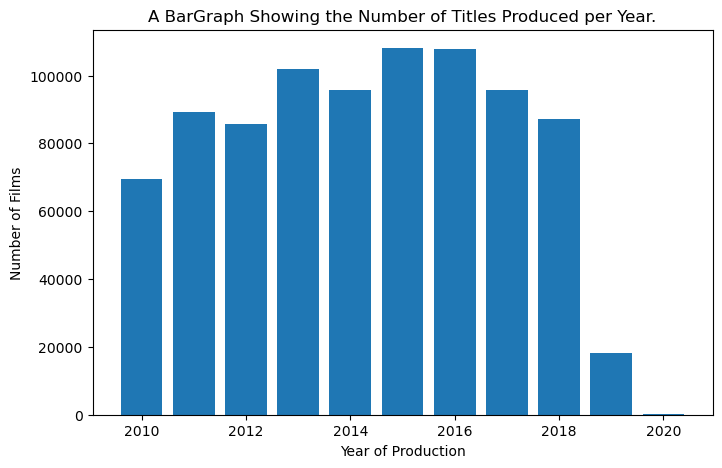

In [104]:
year_title_frame = df.groupby('start_year').title_id.agg(len).to_frame()
year_title_frame = year_title_frame.reset_index()

# Timeline valiables
year_fr = list(year_title_frame['start_year'])
year_title_fr = list(year_title_frame['title_id'])

plt.figure(figsize = (8,5))
plt.title('A BarGraph Showing the Number of Titles Produced per Year.')
plt.bar(year_fr, year_title_fr)
plt.xlabel('Year of Production')
plt.ylabel('Number of Films')
plt.show()

C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


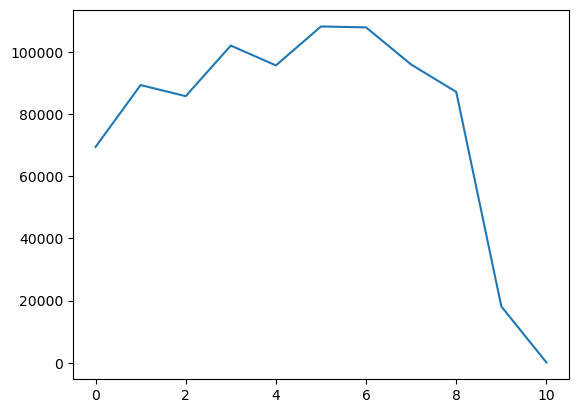

In [105]:
sns.lineplot(data = year_title_fr)
plt.show()

## (2) What the timeline of study?

In [106]:
year_timeline = sorted(df.start_year.unique())
year_timeline

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [107]:
# oldest year in Dataset
oldest_year = df.start_year.min()
print(f'The oldest year in the dataset is {oldest_year}.')

# latest year
latest_year = df.start_year.max()
print(f'The latest year in the dataset is {latest_year}.')

The oldest year in the dataset is 2010.
The latest year in the dataset is 2020.


> **Inference**\
> This means that the dataset spans a perid of 10 years from 2010 to the recent 2020 year.

In [108]:
# Checking which rows have a release date below 2010
below_2010 = len(df.loc[df.release_date <= '2010-01-01'].sort_values(by = 'release_date', 
                                                    ascending = True))#[1500:1515]

# how many `release_dates`
all_years = len(df.release_date)

# perc of rows below 2010
below_2010 / all_years * 100

1.5430783808386357

In [109]:
df.groupby(['start_year']).start_year.agg(len)
bar_data = df.groupby(['start_year']).start_year.agg(len)

bar_df = pd.DataFrame(bar_data)
X_Vals = list(bar_df.index)
Y_Vals = list(bar_df.start_year)

print(X_Vals, Y_Vals, sep = '\n\n')

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

[69377, 89283, 85708, 101963, 95597, 108103, 107813, 95876, 87077, 18142, 123]


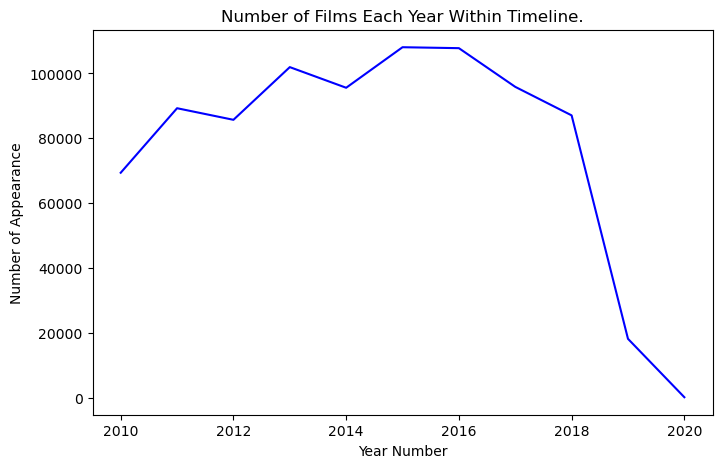

In [110]:
# Plot Size
plt.figure(figsize=(8,5))

# Plot Title
plt.title('Number of Films Each Year Within Timeline.')

# sns.lineplot(data = spotify_data)
plt.plot(X_Vals, Y_Vals, color = 'b', linewidth = '1.5')

# Labels
plt.xlabel("Year Number")
plt.ylabel("Number of Appearance")

# Plot Show
plt.show()

## (3) What are the variety of languages in the dataset?

In [111]:
# Seeking the unique language elements in data
lang_list = df.original_language.unique()#.tolist()

# The langauges present in the dataset
# print(lang_list, end = '\n\n')

# number of languages in the dataset
len_lang_list = len(lang_list)

# Print results
print(f"There are {len_lang_list} Film langueges in the Cleaned Dataset.",
     f"These includes, but not limited to, {lang_list[:10]}.", sep = '\n\n',
     end = '\n\n')

There are 71 Film langueges in the Cleaned Dataset.

These includes, but not limited to, ['en' 'sv' 'de' 'fa' 'it' 'ka' 'fr' 'es' 'zh' 'ru'].



C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\3491129733.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  lang_dom_perf = df.groupby(['original_language']).domestic_gross.agg([len, max])


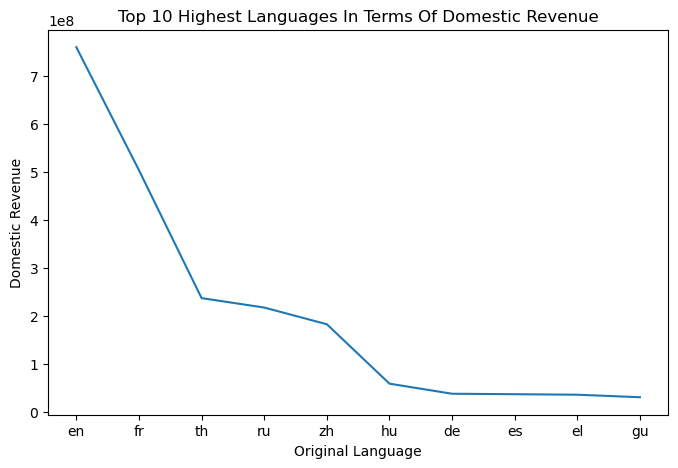

In [112]:
# Top performing languages domestically
lang_dom_perf = df.groupby(['original_language']).domestic_gross.agg([len, max])
lang_dom_perf = lang_dom_perf.reset_index()
lang_dom_perf = lang_dom_perf.sort_values(by = 'max', ascending = False)[:10]
lang_dom_perf.set_index('original_language', inplace = True)
lang_dom_perf = lang_dom_perf.rename(columns = {'max': 'domestic_gross', 'len': 'no_of_appearance'})
lang_dom_perf

# Line chart showing the Top 10 higest languages in terms of Domestic revenue
plt.figure(figsize = (8,5))
plt.title('Top 10 Highest Languages In Terms Of Domestic Revenue')
plt.plot(lang_dom_perf.domestic_gross)
plt.xlabel('Original Language')
plt.ylabel('Domestic Revenue')
plt.show()

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\26479270.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  lang_wor_perf = df.groupby(['original_language']).worldwide_gross.agg([len, max])


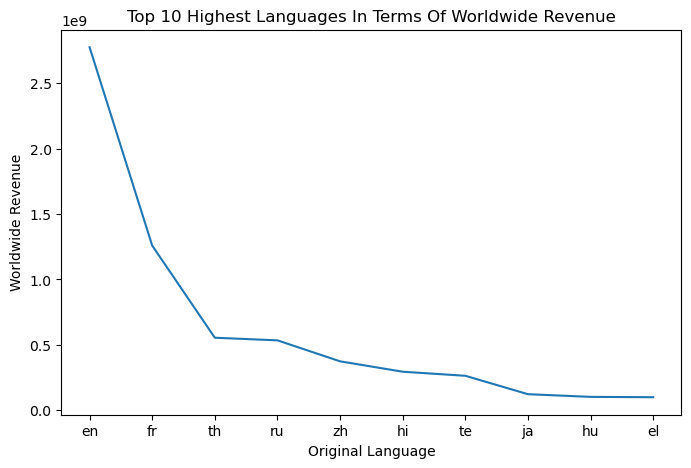

In [113]:
# Top performing languages worldwide
lang_wor_perf = df.groupby(['original_language']).worldwide_gross.agg([len, max])
lang_wor_perf = lang_wor_perf.reset_index()
lang_wor_perf = lang_wor_perf.sort_values(by = 'max', ascending = False)[:10]
lang_wor_perf.set_index('original_language', inplace = True)
lang_wor_perf = lang_wor_perf.rename(columns = {'max': 'worldwide_gross', 'len': 'no_of_appearance'})
lang_wor_perf

# Line chart showing the Top 10 higest languages in terms of Domestic revenue
plt.figure(figsize = (8,5))
plt.title('Top 10 Highest Languages In Terms Of Worldwide Revenue')
plt.plot(lang_wor_perf.worldwide_gross)
plt.xlabel('Original Language')
plt.ylabel('Worldwide Revenue')
plt.show()

## (4) How many original titles do we have currently?`

In [114]:
# Investigating original titles
originals_titles = (df.is_original_title == 'Yes').sum()
non_originals_titles = (df.is_original_title == 'No').sum()
Unknwn_originals_titles = (df.is_original_title == 'unknown').sum()

print(f'The Number of Original Films are {originals_titles}.', 
      f'There are {non_originals_titles} remake films.', 
      f'There are {Unknwn_originals_titles} unknown films.', 
      sep = '\n')

The Number of Original Films are 183219.
There are 675815 remake films.
There are 0 unknown films.


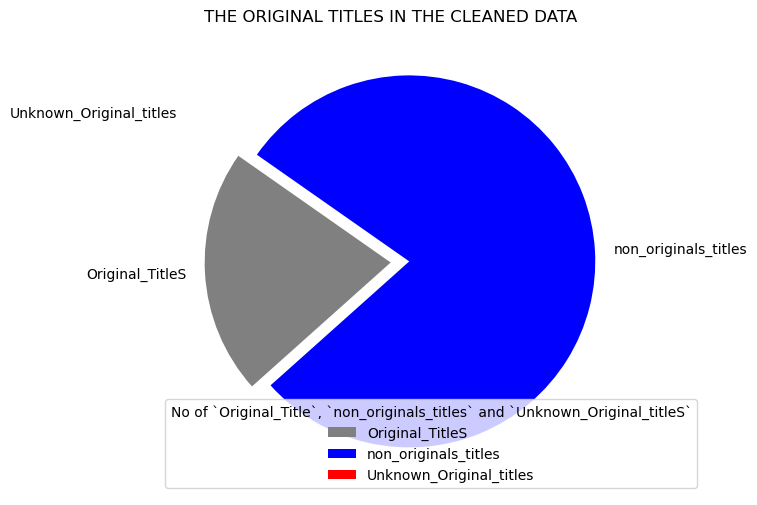

In [115]:
# PieChart
y = np.array((originals_titles, non_originals_titles, Unknwn_originals_titles))
mylabels = ["Original_TitleS", "non_originals_titles", 'Unknown_Original_titles']

# Plot size
plt.figure(figsize = (6, 8))

# Plot Title
plt.title("THE ORIGINAL TITLES IN THE CLEANED DATA")

# plot parameters
myexplode = [0.0, 0.1, 0.3]
mycolors = ['gray', 'blue', 'red']

# The Plot
plt.pie(y, labels = mylabels, startangle = 145, 
        explode = myexplode, shadow = False, 
        colors = mycolors)

# Plot Legend
plt.legend(title = 
           'No of `Original_Title`, `non_originals_titles` and `Unknown_Original_titleS`', 
           loc ="lower left")

# Plot Show
plt.show()

C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


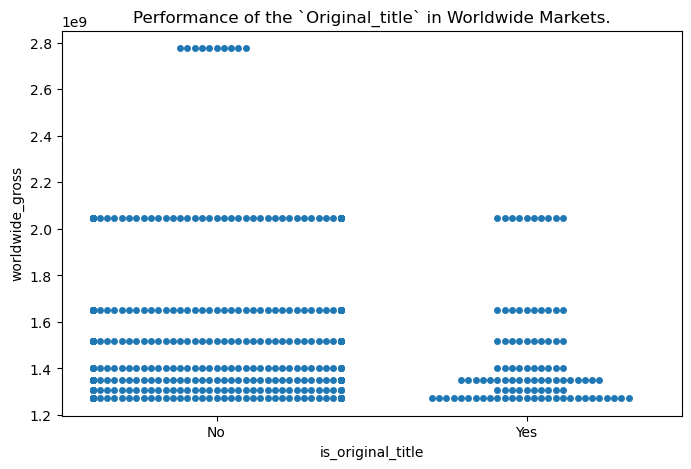

In [116]:
orig_title_perf = df[['is_original_title', 'domestic_gross', 'worldwide_gross']]
# orig_title_perf.sort_values(by = 'worldwide_gross', ascending = True)
orig_title_perf = orig_title_perf.sort_values(by = 'worldwide_gross', ascending = False)
orig_title_perf = orig_title_perf[:1000]

# plot size
plt.figure(figsize = (8, 5))

# plot title
plt.title("Performance of the `Original_title` in Worldwide Markets.")

# The Plot
sns.swarmplot(x = orig_title_perf['is_original_title'],
              y = orig_title_perf['worldwide_gross'])

plt.show()

In [117]:
# Determining which genre is represented by '[10402, 18, 10749]'
df.genres.loc[(df.genre_ids == '[10402, 18, 10749]')].iloc[0]

'Drama,Music,Romance'

## (4) What is the average runtime for a film?

In [118]:
df.runtime_minutes.describe().to_frame()

,runtime_minutes
count,859062.000000
mean,94.491577
std,24.547865
min,1.000000
25%,84.000000
50%,93.000000
75%,105.000000
max,1834.000000


The Average runtime of the film is runtime_minutes    94.491577
dtype: float64.


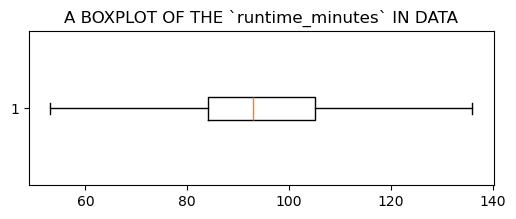

In [119]:
# Choosing the runtime cols
runtime_boxplot = pd.DataFrame(df.runtime_minutes)

# The Average runtime of films is:
Avg_runtime = runtime_boxplot.mean() # 94.491577

# print(Results)
print(f"The Average runtime of the film is {Avg_runtime}.")

# Size Figure
plt.figure(figsize = (6, 2))

# Plot Title
plt.title('A BOXPLOT OF THE `runtime_minutes` IN DATA')

# Plot
plt.boxplot(runtime_boxplot, showfliers = False, notch=False, vert=False)

# Show
plt.show()

## (5) How many studios are there?

In [120]:
# No of rows in the Cleaned Rows
total = df.shape[0]

# Print(No of rows)
print(total)

859062


In [121]:
# no of Unknown Studios
no_of_unknown_studios = df.studio.isnull().sum()

# the `known` studios 
unique_known_studios = df.studio.loc[df.studio.notna()].unique()

# no of unknown studios?
print(f"There are {no_of_unknown_studios} Unknown Studios.", 
      end = '\n\n')

# no of unique studio?
print(f"There are {unique_known_studios[:15]}, and more, Uniquely known Studios.", 
      end = '\n\n')

# perc of known studios
len(df.studio.loc[df.studio.notna()].tolist()) / len(df.studio) * 100

There are 657456 Unknown Studios.

There are ['BV' 'Uni.' 'WB' 'Sony' 'RAtt.' 'Fox' 'IFC' 'LGF' 'BG' 'WB (NL)' 'Focus'
 'MNE' 'WGUSA' 'Scre.' 'Par.'], and more, Uniquely known Studios.



23.468154801399667

In [122]:
df.groupby(['studio', 'domestic_gross']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\3626461492.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['studio', 'domestic_gross']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)


worldwide_gross
studio domestic_gross                 
BV     678815482.0        2.048134e+09
Uni.   652270625.0        1.648855e+09
       353007020.0        1.518723e+09
BV     459005868.0        1.403014e+09
       700059566.0        1.348258e+09
...                                ...
Magn.  1242.0             1.242000e+03
BG     0.0                0.000000e+00
FoxS   0.0                0.000000e+00
LG/S   0.0                0.000000e+00
Magn.  0.0                0.000000e+00

[1152 rows x 1 columns]

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\3634178314.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  Top_10_performing_Studios_Domestically = df.groupby(['studio']).domestic_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)[:10]


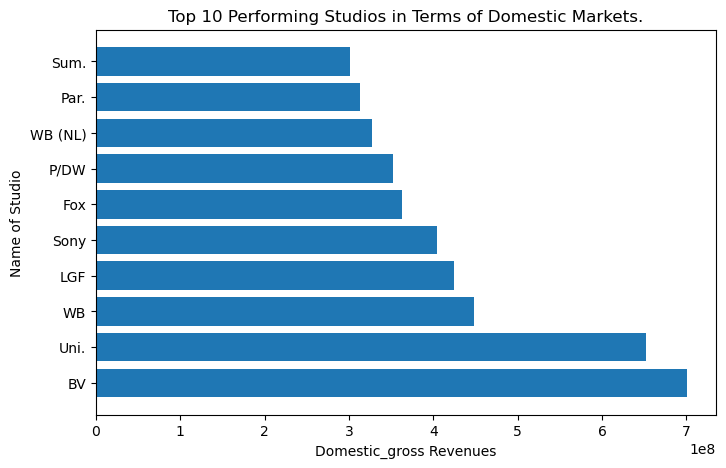

In [123]:
# Top 10 performing Studios Domestically
Top_10_performing_Studios_Domestically = df.groupby(['studio']).domestic_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)[:10]
Top_10_performing_Studios_Domestically = Top_10_performing_Studios_Domestically.reset_index()
Top_10_performing_Studios_Domestically

# valuables
x_Top_10_performing_Studios_Domestically_studio = Top_10_performing_Studios_Domestically.studio
y_Top_10_performing_Studios_Domestically_worldwide = Top_10_performing_Studios_Domestically.domestic_gross

# The Plot
plt.figure(figsize=(8,5))
plt.title('Top 10 Performing Studios in Terms of Domestic Markets.')
plt.barh(x_Top_10_performing_Studios_Domestically_studio, y_Top_10_performing_Studios_Domestically_worldwide)
plt.xlabel('Domestic_gross Revenues')
plt.ylabel('Name of Studio')
plt.show()

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\3637054022.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  Top_10_performing_Studios_Worldwide = df.groupby(['studio']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]


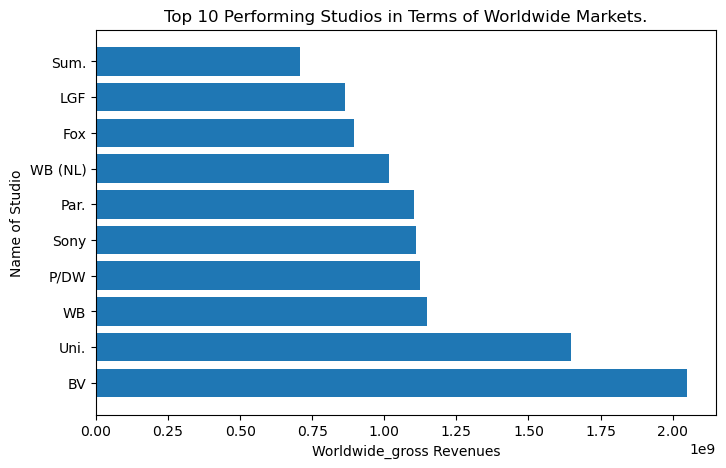

In [124]:
# Top 10 performing Studios Worldwide
Top_10_performing_Studios_Worldwide = df.groupby(['studio']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]
Top_10_performing_Studios_Worldwide = Top_10_performing_Studios_Worldwide.reset_index()
Top_10_performing_Studios_Worldwide

# valuables
x_Top_10_performing_Studios_Worldwide_studio = Top_10_performing_Studios_Worldwide.studio
y_Top_10_performing_Studios_worldwide_gross = Top_10_performing_Studios_Worldwide.worldwide_gross

# The Plot
plt.figure(figsize=(8,5))
plt.title('Top 10 Performing Studios in Terms of Worldwide Markets.')
plt.barh(x_Top_10_performing_Studios_Worldwide_studio, y_Top_10_performing_Studios_worldwide_gross)
plt.xlabel('Worldwide_gross Revenues')
plt.ylabel('Name of Studio')
plt.show()

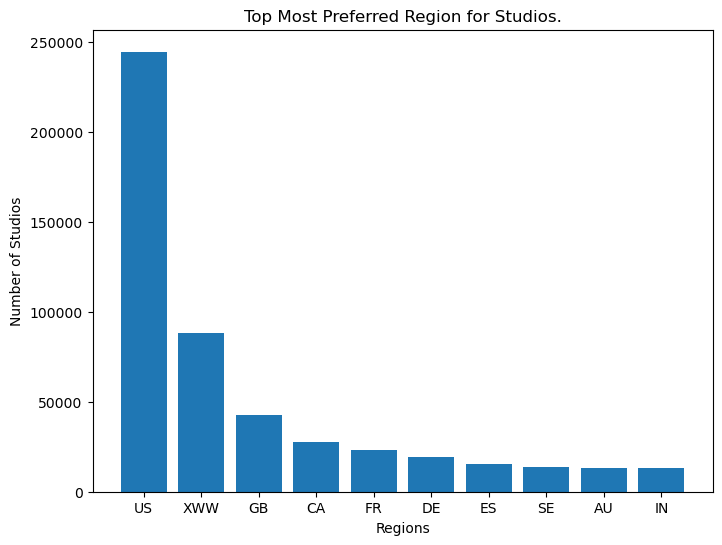

In [125]:
# Studios in regions
stud_reg_df = df.groupby(['region']).studio.agg(len).to_frame()
stud_reg_df = stud_reg_df.reset_index()

# Top most Regions with the most Studio
stud_reg_df = stud_reg_df.sort_values(by = 'studio', ascending = False)[:10]
stud_reg_df

x_va = list(stud_reg_df.region)
y_va = list(stud_reg_df.studio)

plt.figure(figsize = (8,6))
plt.title('Top Most Preferred Region for Studios.')
plt.bar(x_va, y_va)
plt.xlabel('Regions')
plt.ylabel('Number of Studios')
plt.show()

## (6) How many genres are there in the dataset?

In [126]:
df.genre_ids.unique()

array(['[16, 10751, 35]', '[16, 10751]', '[35, 18]', ...,
       '[99, 10752, 14]', '[878, 35, 28, 12]', '[878, 80]'], dtype=object)

In [127]:
# Top 10 most frequent genres
gen_df = df.groupby(['genre_ids', 'domestic_gross']).worldwide_gross.agg(max).to_frame()
gen_df.head(10)
gen_df = gen_df.reset_index()
gen_df = gen_df[:10]
gen_df = gen_df.set_index('genre_ids')
gen_df

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\2481724891.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gen_df = df.groupby(['genre_ids', 'domestic_gross']).worldwide_gross.agg(max).to_frame()


,domestic_gross,worldwide_gross
genre_ids,,
"[10402, 14, 28, 10751]",195459.0,20466016.0
"[10402, 18, 10749]",35074677.0,165552290.0
"[10402, 18, 35]",56001.0,567219.0
"[10402, 18]",44701.0,44701.0
"[10402, 18]",8888355.0,16723377.0
"[10402, 18]",32172757.0,66742138.0
"[10402, 18]",47047013.0,65282732.0
"[10402, 27]",0.0,0.0
"[10402, 99]",0.0,7943.0


C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\1548953937.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


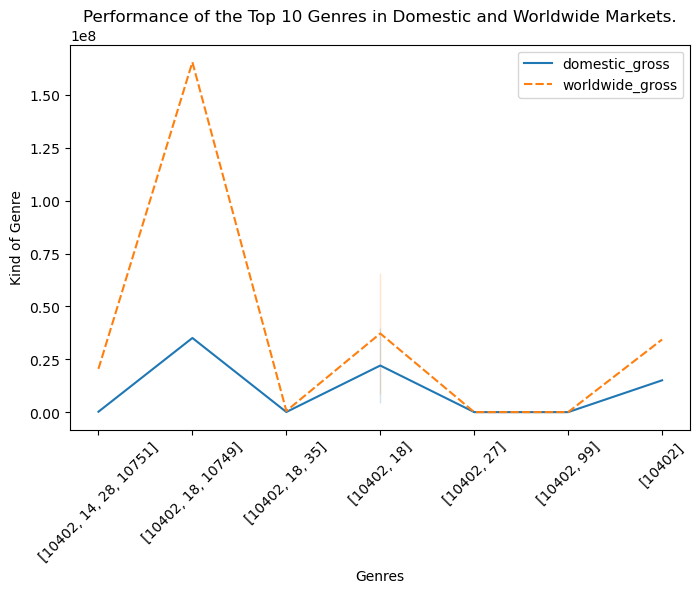

In [128]:
# Values
# y_gen_values = list(gen_df.genre_ids)
# x_gen_values = gen_df.genres.tolist()

# Plot size
plt.figure(figsize = (8,5))

# Plot Title
plt.title('Performance of the Top 10 Genres in Domestic and Worldwide Markets.')

# The Plot
# plt.barh(x_gen_values, y_gen_values, color = "green")
my_plot = sns.lineplot(data = gen_df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

# labels
plt.xlabel('Genres')
plt.ylabel('Kind of Genre')

# Show the Plot
plt.show()

## (7) How are the regions in the dataset

In [129]:
# No of Regions in Data
df.region.nunique()

135

In [130]:
# Top 10 regions
reg_val_counts = df.region.value_counts().to_frame()[:10]
reg_val_counts = reg_val_counts.reset_index()
reg_val_counts = reg_val_counts.set_index('region')
reg_val_counts

,count
region,
US,244388
XWW,88322
GB,42825
CA,27850
FR,22980
DE,19227
ES,15351
SE,13513
AU,13243


C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\3720678296.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_10_perf_reg_dom = df.groupby('region').domestic_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)[:10]


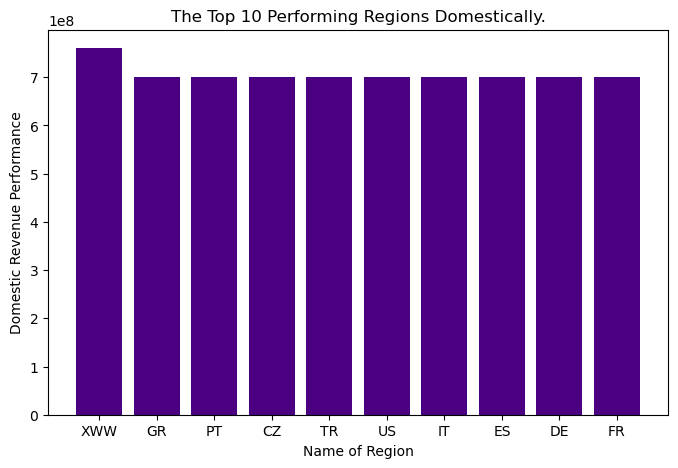

In [131]:
# Top 10 Performing Regions Domestically
top_10_perf_reg_dom = df.groupby('region').domestic_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)[:10]
top_10_perf_reg_dom = top_10_perf_reg_dom.reset_index()
top_10_perf_reg_dom

# values
x_value_dom = list(top_10_perf_reg_dom.region)
y_value_dom = list(top_10_perf_reg_dom.domestic_gross)

# The plot
plt.figure(figsize = (8, 5))
plt.title('The Top 10 Performing Regions Domestically.')
plt.bar(x_value_dom, y_value_dom, color = 'indigo')
plt.xlabel('Name of Region')
plt.ylabel('Domestic Revenue Performance')
plt.show()

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\2067417992.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_10_perf_reg_wor = df.groupby('region').worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]


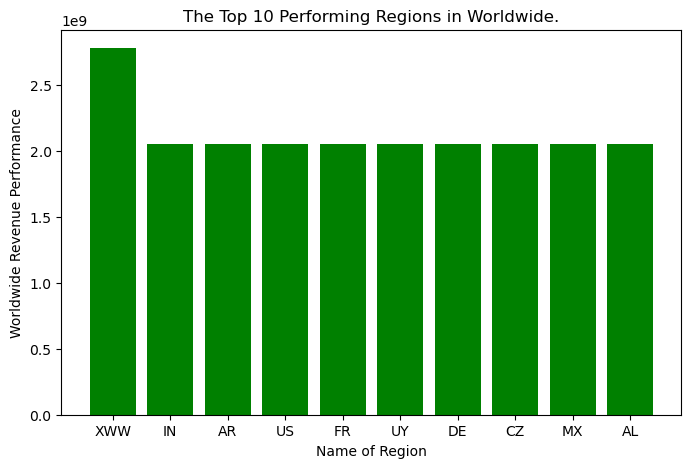

In [132]:
# Top 10 Performing Regions Worldwide
top_10_perf_reg_wor = df.groupby('region').worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]
top_10_perf_reg_wor = top_10_perf_reg_wor.reset_index()
top_10_perf_reg_wor

# values
x_value_wor= list(top_10_perf_reg_wor.region)
y_value_wor = list(top_10_perf_reg_wor.worldwide_gross)

# The plot
plt.figure(figsize = (8, 5))
plt.title('The Top 10 Performing Regions in Worldwide.')
plt.bar(x_value_wor, y_value_wor, color = 'g')
plt.xlabel('Name of Region')
plt.ylabel('Worldwide Revenue Performance')
plt.show()

In [133]:
reg_df = df.groupby(['region', 'domestic_gross']).worldwide_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)
reg_df = reg_df.reset_index()
reg_df = reg_df.set_index('region')
reg_df = reg_df[:10]
reg_df

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\1250098969.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  reg_df = df.groupby(['region', 'domestic_gross']).worldwide_gross.agg(max).to_frame().sort_values(by = 'domestic_gross', ascending = False)


,domestic_gross,worldwide_gross
region,,
XWW,760507625.0,2.776345e+09
CZ,700059566.0,1.348258e+09
IT,700059566.0,1.348258e+09
ES,700059566.0,1.348258e+09
PT,700059566.0,1.348258e+09
GR,700059566.0,1.348258e+09
DE,700059566.0,1.348258e+09
XWW,700059566.0,1.348258e+09
US,700059566.0,1.348258e+09


C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\1103414480.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  My_plot.set_xticklabels(My_plot.get_xticklabels(), rotation=45)


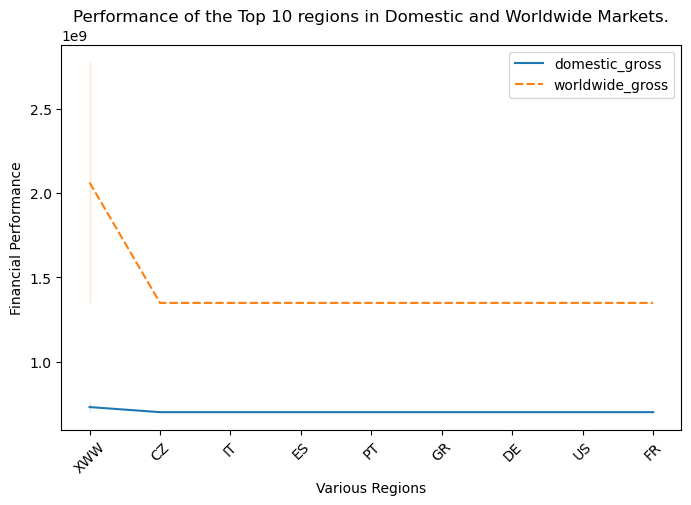

In [134]:
# Plot size
plt.figure(figsize = (8, 5))

# Plot Title
plt.title('Performance of the Top 10 regions in Domestic and Worldwide Markets.')

# The Plot
# plt.barh(x_gen_values, y_gen_values, color = "green")
My_plot = sns.lineplot(data = reg_df)
My_plot.set_xticklabels(My_plot.get_xticklabels(), rotation=45)

# labels
plt.xlabel('Various Regions')
plt.ylabel('Financial Performance')

# Show the Plot
plt.show()

## (8) Top 10 Language 

In [135]:
df.original_language.unique()

array(['en', 'sv', 'de', 'fa', 'it', 'ka', 'fr', 'es', 'zh', 'ru', 'hu',
       'ko', 'cn', 'no', 'he', 'pt', 'id', 'ja', 'xx', 'ro', 'tl', 'el',
       'gu', 'hi', 'th', 'ar', 'uk', 'te', 'ta', 'pl', 'da', 'nl', 'fi',
       'is', 'ur', 'kn', 'cs', 'vi', 'tr', 'bn', 'lt', 'kk', 'ab', 'ml',
       'sn', 'hz', 'ku', 'lv', 'ca', 'mr', 'pa', 'bg', 'sq', 'et', 'eu',
       'sw', 'mi', 'sr', 'lo', 'yi', 'hr', 'hy', 'dz', 'cr', 'cy', 'af',
       'ne', 'ky', 'bo', 'xh', 'ha'], dtype=object)

In [136]:
# Choice of columns
lang_df_perf = df[['original_language', 'domestic_gross', 'worldwide_gross']]

# Groupby Frame
lang_df_perf = lang_df_perf.groupby(['original_language']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]
lang_df_perf = lang_df_perf.reset_index()
lang_df_perf = lang_df_perf.set_index('original_language')

C:\Users\rurig\AppData\Local\Temp\ipykernel_17392\4002585231.py:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  lang_df_perf = lang_df_perf.groupby(['original_language']).worldwide_gross.agg(max).to_frame().sort_values(by = 'worldwide_gross', ascending = False)[:10]


C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rurig\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Performance of the Top 10 Languages'}, xlabel='original_language', ylabel='worldwide_gross'>

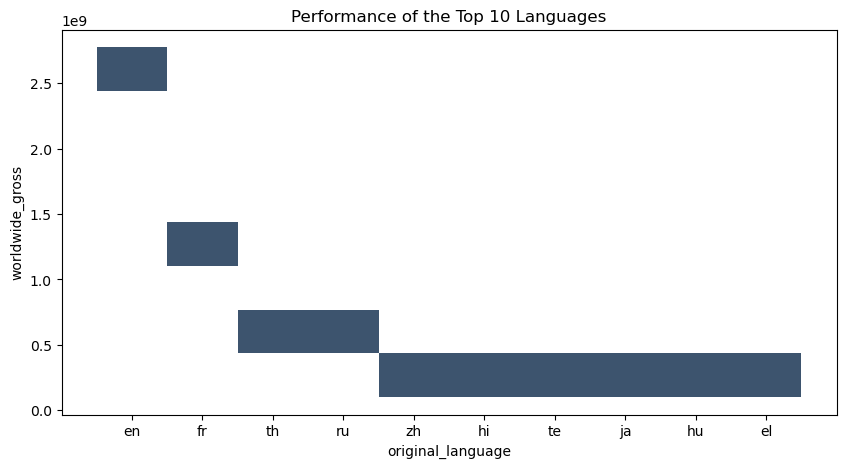

In [137]:
# plot size
plt.figure(figsize = (10,5))
# Plot Title
plt.title('Performance of the Top 10 Languages')
# The Plot
sns.histplot(x = lang_df_perf.index, y = lang_df_perf.worldwide_gross)